In [ ]:
#Import Necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import pandas as pd

In [ ]:
# Load the provided datasets
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
data_store = pd.read_csv('/content/stores.csv')
data_holi = pd.read_csv('/content/holidays_events.csv')
data_oil = pd.read_csv('/content/oil.csv')
data_trans = pd.read_csv('/content/transactions.csv')
samp_subm = pd.read_csv('/content/sample_submission.csv')

In [ ]:
print(f'Number of data_oil samples: {data_oil.shape}')
print(f'Number of train_data samples: {train_data.shape}')
print(f'Number of test_data samples: {test_data.shape}')
print(f'Number of samp_subm samples: {samp_subm.shape}')
print(f'Number of data_holi samples: {data_holi.shape}')
print(f'Number of data_store samples: {data_store.shape}')
print(f'Number of data_trans samples: {data_trans.shape}')
print(train_data.info())
print(train_data.columns)
print(train_data.head())

Number of data_oil samples: (1218, 2)
Number of train_data samples: (3000888, 6)
Number of test_data samples: (28512, 5)
Number of samp_subm samples: (28512, 2)
Number of data_holi samples: (350, 6)
Number of data_store samples: (54, 5)
Number of data_trans samples: (83488, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None
Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   

In [ ]:
# Merge store information
train_data = pd.merge(train_data, data_store, how='left', on='store_nbr')
test_data = pd.merge(test_data, data_store, how='left', on='store_nbr')

# Merge holiday information
train_data = pd.merge(train_data, data_holi, how='left', left_on='date', right_on='date')
test_data = pd.merge(test_data, data_holi, how='left', left_on='date', right_on='date')

# Merge oil prices
train_data = pd.merge(train_data, data_oil, how='left', left_on='date', right_on='date')
test_data = pd.merge(test_data, data_oil, how='left', left_on='date', right_on='date')


In [ ]:
train_data['day_of_week'] = pd.to_datetime(train_data['date']).dt.dayofweek
test_data['day_of_week'] = pd.to_datetime(test_data['date']).dt.dayofweek

In [ ]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1


In [ ]:
train_data['log_sales'] = np.log1p(train_data['sales'])

In [ ]:
test_data.head()

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico,day_of_week
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.8,2
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.8,2
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.8,2
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.8,2
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.8,2


In [ ]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico,day_of_week,log_sales
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,0.0
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,0.0


Text(0, 0.5, 'Crude Oil')

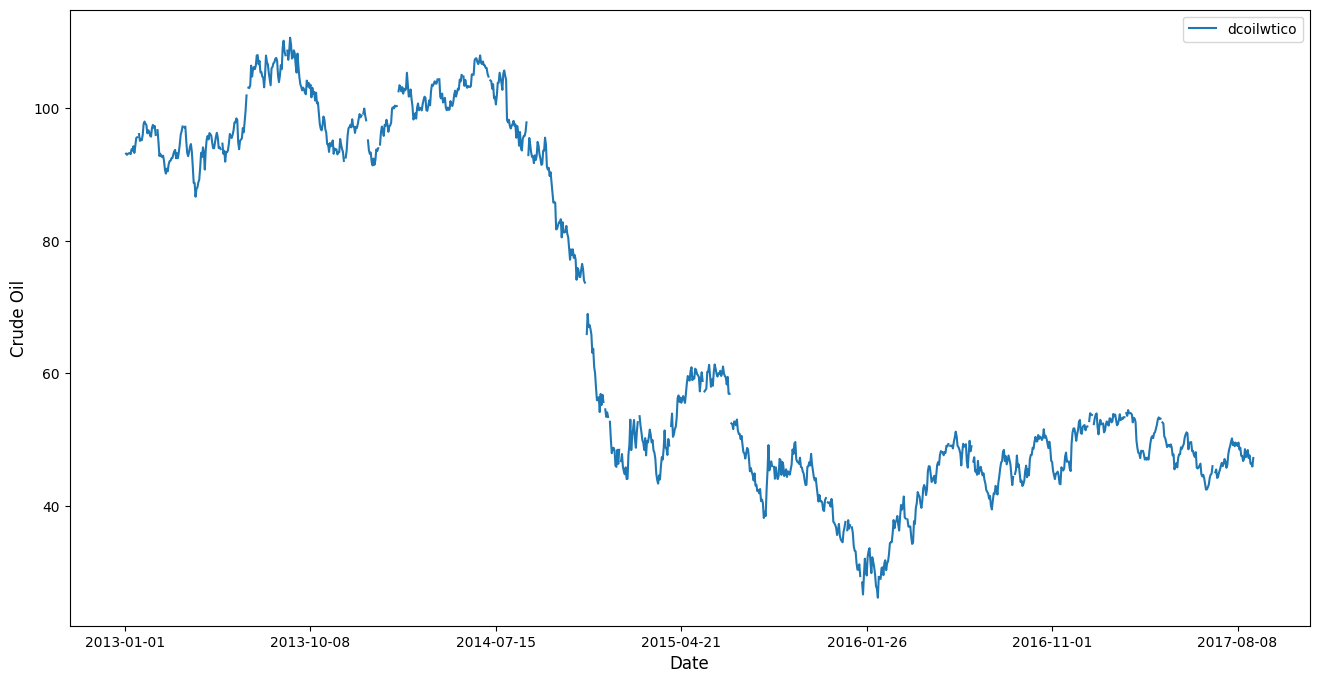

In [ ]:
ax = data_oil.set_index('date').plot(figsize = (16, 8))
ax.set_xlabel('Date', fontsize = 'large')
ax.set_ylabel("Crude Oil", fontsize = 'large')

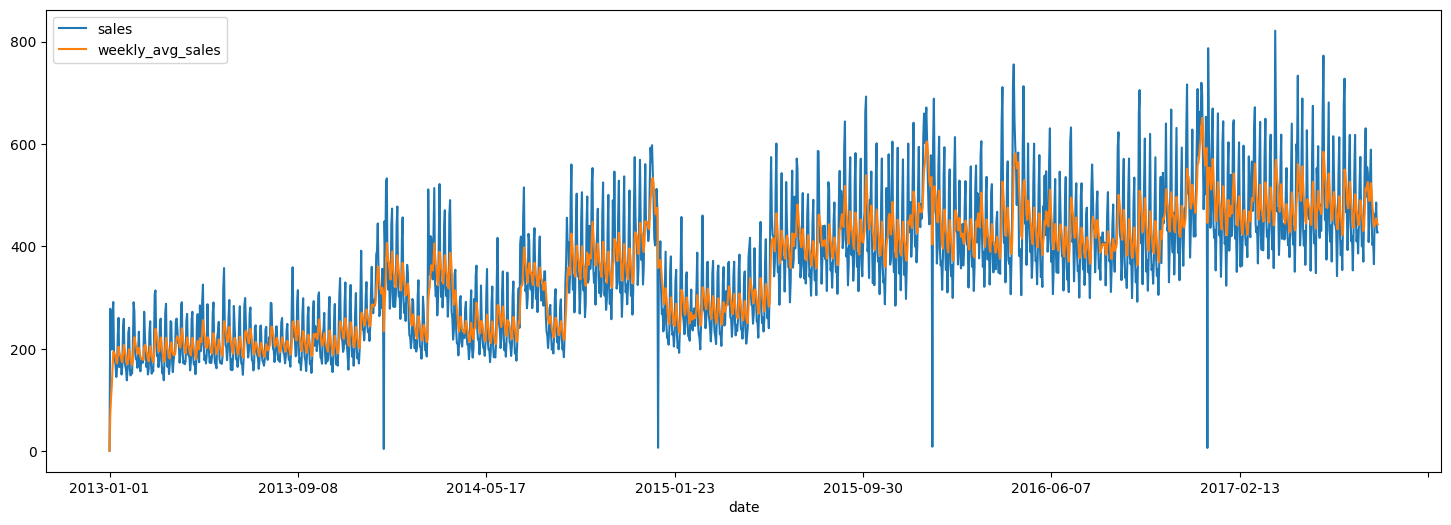

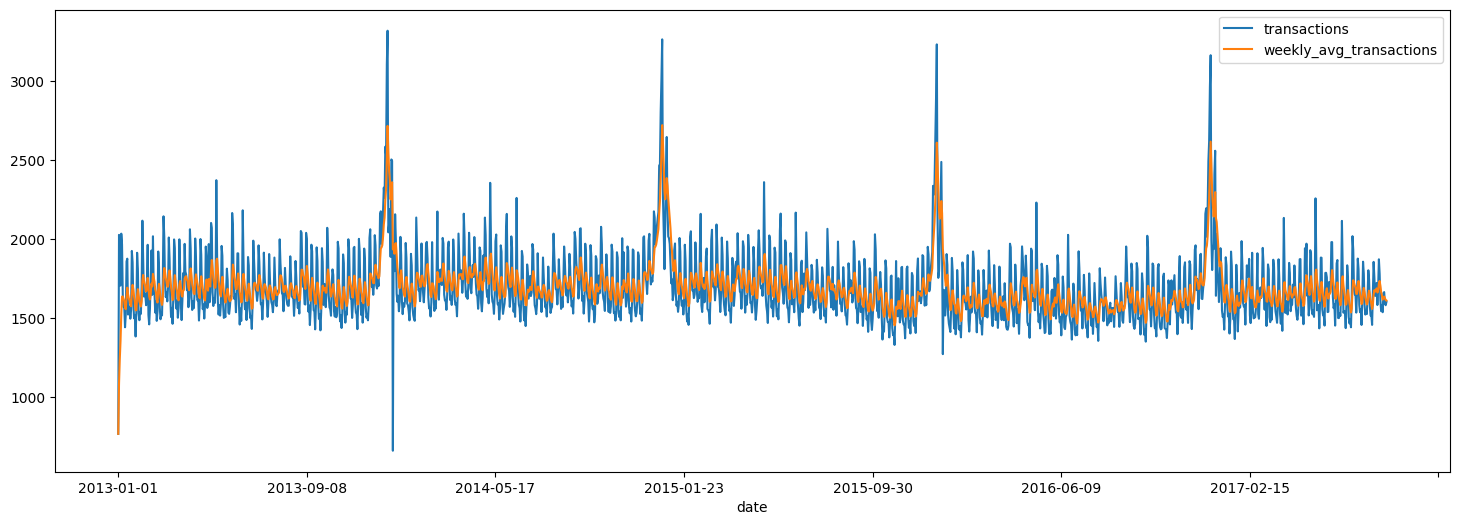

In [ ]:
avg_sales = train_data.groupby('date').agg({'sales': 'mean'}).reset_index()
avg_sales['weekly_avg_sales'] = avg_sales['sales'].ewm(span=7, adjust=False).mean()
ax1 = avg_sales.plot(x= 'date', y= ['sales', 'weekly_avg_sales'], figsize=(18,6))

avg_transactions = data_trans.groupby('date').agg({'transactions': 'mean'}).reset_index()
avg_transactions['weekly_avg_transactions'] = avg_transactions['transactions'].ewm(span=7, adjust=False).mean()

ax2 = avg_transactions.plot(x= 'date', y= ['transactions', 'weekly_avg_transactions'], figsize=(18,6))

In [ ]:
print(data_oil.head())
print(avg_sales.head())
print(avg_transactions.head())

         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20
         date       sales  weekly_avg_sales
0  2013-01-01    1.409438          1.409438
1  2013-01-02  278.390807         70.654780
2  2013-01-03  202.840197        103.701135
3  2013-01-04  198.911154        127.503640
4  2013-01-05  267.873244        162.596041
         date  transactions  weekly_avg_transactions
0  2013-01-01    770.000000               770.000000
1  2013-01-02   2026.413043              1084.103261
2  2013-01-03   1706.608696              1239.729620
3  2013-01-04   1706.391304              1356.395041
4  2013-01-05   2034.195652              1525.845194


In [ ]:
data_oil['sales'] = avg_sales['sales']
data_oil['transactions'] = avg_transactions['transactions']
data_oil.corr()

<ipython-input-183-45614da58b87>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_oil.corr()


,dcoilwtico,sales,transactions
dcoilwtico,1.000000,-0.500805,0.04319
sales,-0.500805,1.000000,0.37651
transactions,0.043190,0.376510,1.00000


#Let's check items that are most sold and the promotion to see which items influence the most for the total sales

In [ ]:
print(train_data.family.unique())
print(len(train_data.family.unique()))
train_data['family'] = train_data['family'].astype('category')
train_data['family_category'] = train_data['family'].cat.codes

family_category = dict( zip( train_data['family'].cat.codes, train_data['family'] ) )
family_category

['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']
33


{0: 'AUTOMOTIVE',
 1: 'BABY CARE',
 2: 'BEAUTY',
 3: 'BEVERAGES',
 4: 'BOOKS',
 5: 'BREAD/BAKERY',
 6: 'CELEBRATION',
 7: 'CLEANING',
 8: 'DAIRY',
 9: 'DELI',
 10: 'EGGS',
 11: 'FROZEN FOODS',
 12: 'GROCERY I',
 13: 'GROCERY II',
 14: 'HARDWARE',
 15: 'HOME AND KITCHEN I',
 16: 'HOME AND KITCHEN II',
 17: 'HOME APPLIANCES',
 18: 'HOME CARE',
 19: 'LADIESWEAR',
 20: 'LAWN AND GARDEN',
 21: 'LINGERIE',
 22: 'LIQUOR,WINE,BEER',
 23: 'MAGAZINES',
 24: 'MEATS',
 25: 'PERSONAL CARE',
 26: 'PET SUPPLIES',
 27: 'PLAYERS AND ELECTRONICS',
 28: 'POULTRY',
 29: 'PREPARED FOODS',
 30: 'PRODUCE',
 31: 'SCHOOL AND OFFICE SUPPLIES',
 32: 'SEAFOOD'}

<ipython-input-185-21640c86544f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_family_types = train_data.groupby(['family_category']).mean()[['sales', 'onpromotion']]


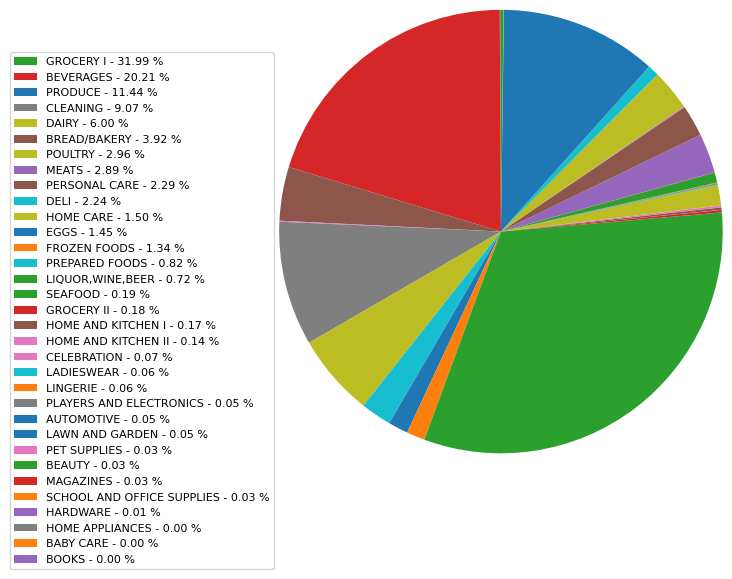

In [ ]:
data_grouped_family_types = train_data.groupby(['family_category']).mean()[['sales', 'onpromotion']]


data_grouped_family_types['%_s'] = 100 * data_grouped_family_types['sales'] / data_grouped_family_types['sales'].sum()
data_grouped_family_types['%_s'] = data_grouped_family_types['%_s'].round(decimals = 3)


percent = 100 * data_grouped_family_types['sales'] / data_grouped_family_types['sales'].sum()
percent = percent.round(decimals = 3)
patches, texts = plt.pie(data_grouped_family_types['%_s'], startangle=90, radius=1.5)


lables_2 = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(family_category.values(), percent)]


sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, lables_2, data_grouped_family_types['%_s']),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

<ipython-input-186-b4e9f3994b96>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_family_types = train_data.groupby(['family_category']).mean()[['sales', 'onpromotion']]


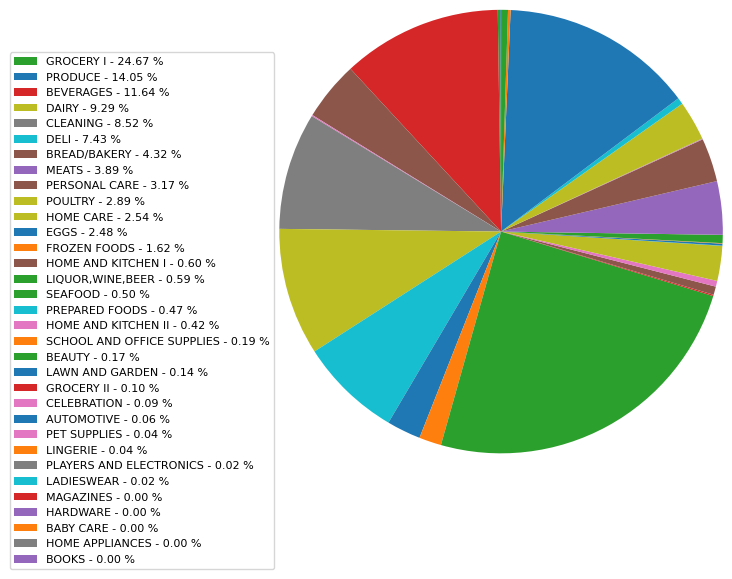

In [ ]:
data_grouped_family_types = train_data.groupby(['family_category']).mean()[['sales', 'onpromotion']]


data_grouped_family_types['%_p'] = 100 * data_grouped_family_types['onpromotion'] / data_grouped_family_types['onpromotion'].sum()
data_grouped_family_types['%_p'] = data_grouped_family_types['%_p'].round(decimals = 3)


percent = 100 * data_grouped_family_types['onpromotion'] / data_grouped_family_types['onpromotion'].sum()
percent = percent.round(decimals = 3)
patches, texts = plt.pie(data_grouped_family_types['%_p'], startangle=90, radius=1.5)


lables_2 = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(family_category.values(), percent)]


sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, lables_2, data_grouped_family_types['%_p']),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)


#The top 5 most sold are Grocery, beverages, cleaning, dairy, and produce. Grocery + beverage account for more than 50% of total sales.

#Let's check sales in different time frames.

In [ ]:
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['day_of_week'] = train_data['date'].dt.dayofweek
train_data['month'] = train_data['date'].dt.month
train_data['year'] = train_data['date'].dt.year

<ipython-input-188-4b14cf366ed5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_day = train_data.groupby(['day_of_week']).mean()['sales']
<ipython-input-188-4b14cf366ed5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_month = train_data.groupby(['month']).mean()['sales']
<ipython-input-188-4b14cf366ed5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_year = train_data.groupb

<Axes: title={'center': 'sales - year'}, xlabel='year'>

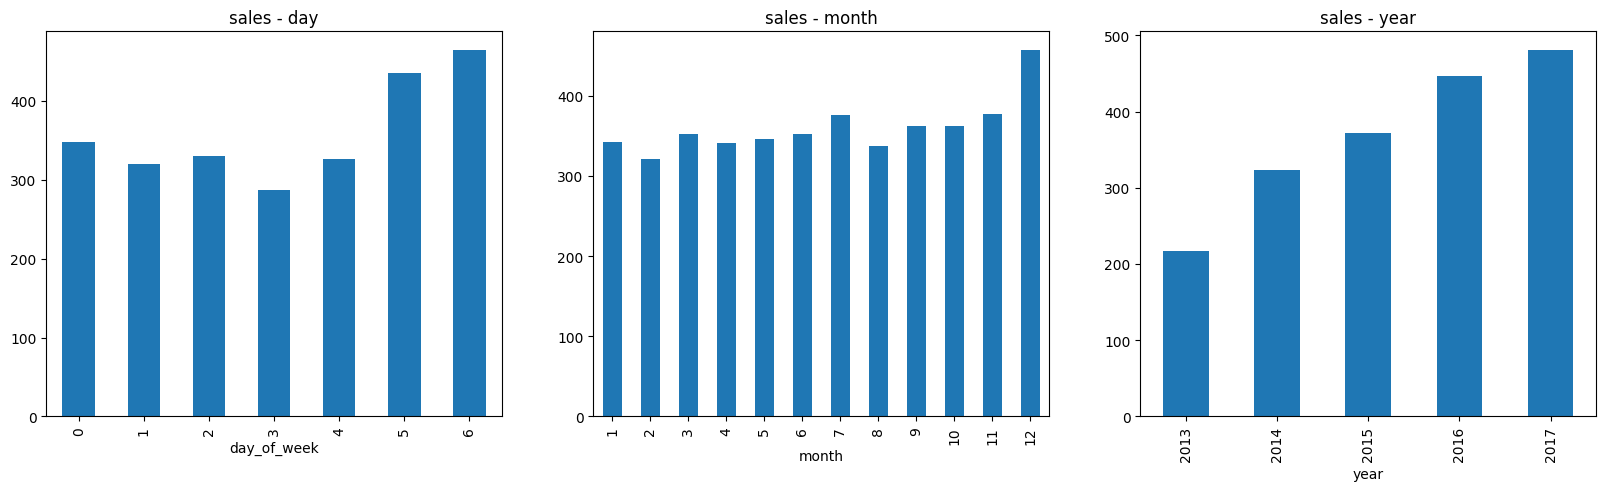

In [ ]:
data_grouped_day = train_data.groupby(['day_of_week']).mean()['sales']
data_grouped_month = train_data.groupby(['month']).mean()['sales']
data_grouped_year = train_data.groupby(['year']).mean()['sales']

plt.subplots(3,1, figsize=(20,5))
plt.subplot(131)
plt.title('sales - day')
data_grouped_day.plot(kind='bar', stacked=True)
plt.subplot(132)
plt.title('sales - month')
data_grouped_month.plot(kind='bar', stacked=True)
plt.subplot(133)
plt.title('sales - year')
data_grouped_year.plot(kind='bar', stacked=True)

Sales analysis in different time frame
* In a daily basis, Saturday and Sunday show the highest sales.
* In a month basis, December sales are particularly strong.
* In a yearly basis, It is growing at steady pace.

#Check sales for holidays

['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64
average holiday sales is 425.4221877399928


<ipython-input-189-42c6249b32f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_type['date'] = pd.to_datetime(day_type['date'])
<ipython-input-189-42c6249b32f1>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_1 = df.groupby(['type']).mean()['sales']


Text(0.5, 1.0, 'average holiday sales')

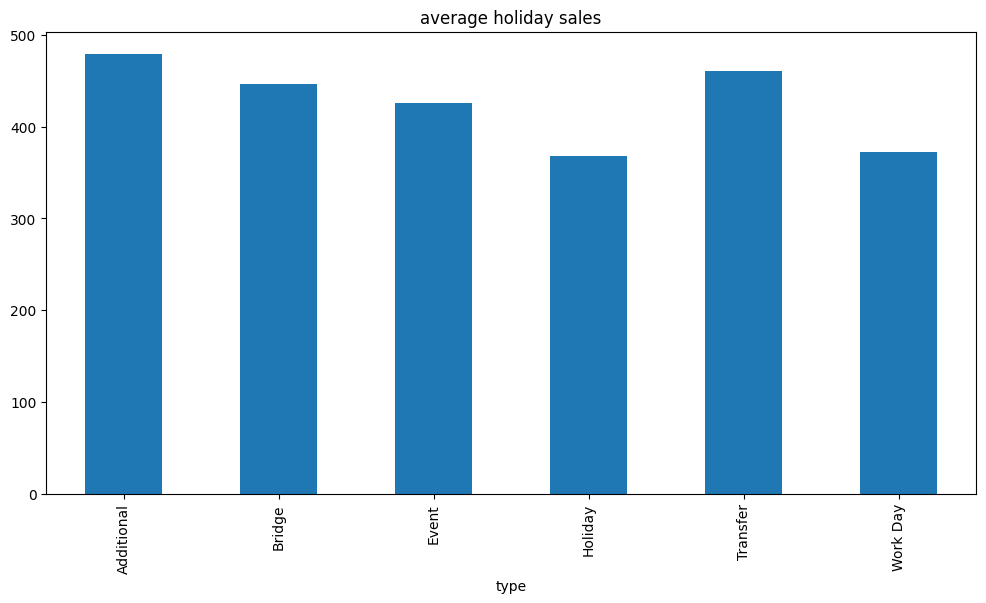

In [ ]:
print(data_holi['type'].unique())
print(data_holi['type'].value_counts())

day_type = data_holi[['date', 'type']]
avg_sales = train_data.groupby('date').agg({'sales': 'mean'}).reset_index()

day_type['date'] = pd.to_datetime(day_type['date'])
avg_sales['date'] = pd.to_datetime(avg_sales['date'])


df = pd.merge_asof(day_type, avg_sales, on = 'date')
df.dropna(inplace= True)
df.reset_index(drop = True, inplace= True)


df_1 = df.groupby(['type']).mean()['sales']
average_holiday_sales = df_1.mean()

print(f'average holiday sales is {average_holiday_sales}')

df_1.plot(kind='bar', figsize = (12,6)).set_title('average holiday sales')


In [ ]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,locale,locale_name,description,transferred,dcoilwtico,day_of_week,log_sales,family_category,month,year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,NaN,1,0.0,0,1,2013
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,NaN,1,0.0,1,1,2013
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,NaN,1,0.0,2,1,2013
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,NaN,1,0.0,3,1,2013
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,NaN,1,0.0,4,1,2013


In [ ]:
test_data.head()

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico,day_of_week
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.8,2
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.8,2
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.8,2
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.8,2
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.8,2


#The average holiday sales are equivalent to Saturday and Sunday sales.

#Model Building



In [ ]:
# Define features and target
features = ['store_nbr', 'onpromotion', 'day_of_week', 'cluster', 'dcoilwtico']

In [ ]:
X_train = pd.get_dummies(train_data[features])
y_train = train_data['log_sales']

# Drop rows with missing values
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Adjust y_train accordingly
X_test = pd.get_dummies(test_data[features])

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
len(X_valid)

419840

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

#Choosing Best Approach

In [ ]:
# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_predict_linear = linear_model.predict(X_valid)

In [ ]:
#2. Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_predict_gb = gb_model.predict(X_valid)

In [ ]:
# 3. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_predict_rf = rf_model.predict(X_valid)

In [ ]:
# Evaluate the models

def evaluate_model(predictions, y_true):
    rmsle = np.sqrt(mean_squared_error(y_true, predictions))
    print(f'Root Mean Squared Logarithmic Error on validation set: {rmsle}')

# Evaluate Linear Regression
evaluate_model(y_predict_linear, y_valid)

# Evaluate Gradient Boosting
evaluate_model(y_predict_gb, y_valid)

# Evaluate Random Forest
evaluate_model(y_predict_rf, y_valid)

Root Mean Squared Logarithmic Error on validation set: 2.4831686895074645
Root Mean Squared Logarithmic Error on validation set: 2.0654946863732793
Root Mean Squared Logarithmic Error on validation set: 2.079435458502048


#Gradient Boosting Regressor

In [ ]:
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_predict = model.predict(X_valid)

In [ ]:
rmsle = np.sqrt(mean_squared_error(y_valid, y_predict))

In [ ]:
print(f'Root Mean Squared Logarithmic Erroron validation set: {rmsle}')

Root Mean Squared Logarithmic Erroron validation set: 2.0654946863732793


In [ ]:
# Features used for training the model
features_train = ['onpromotion', 'cluster', 'dcoilwtico', 'store_nbr', 'day_of_week']

In [ ]:
X_Test_encoded = pd.get_dummies(X_test)

In [ ]:
# Ensure the test dataset has the same columns as the training dataset
missing_cols = set(X_train.columns) - set(X_Test_encoded.columns)
for col in missing_cols:
    X_Test_encoded[col] = 0

In [ ]:
# Reorder columns to match the order in X_train
X_Test_encoded = X_Test_encoded[X_train.columns]
print(X_Test_encoded.isnull().sum())

store_nbr         0
onpromotion       0
day_of_week       0
cluster           0
dcoilwtico     7128
dtype: int64


In [ ]:
imputer = SimpleImputer(strategy='mean')
X_Test_encoded = pd.DataFrame(imputer.fit_transform(X_Test_encoded), columns=X_Test_encoded.columns)
print(X_Test_encoded.isnull().sum())

store_nbr      0
onpromotion    0
day_of_week    0
cluster        0
dcoilwtico     0
dtype: int64


In [ ]:
features_test = ['store_nbr', 'onpromotion', 'day_of_week', 'cluster', 'dcoilwtico']
X_Test = X_test[features]

# Predictions on the test set
y_predict_test = model.predict(X_Test_encoded)

In [219]:
submission_df = pd.DataFrame({
    'id': test['id'],
    'sales': (y_predict_test)
})


In [220]:
submission_df.head()
print(len(submission_df))

28512


In [221]:
# Save the DataFrame to a CSV file
submission_df.to_csv('ML_Final_project.csv', index=False)